In [1]:
### ЗАДАНИЕ 9.11. МОДУЛЬ 13 (HW-01)
### В файле должно содержаться 10 графиков — 10 ответов к заданиям.

### Каждый график и преобразования к нему выполняются в отдельной ячейке.

### Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.

import pandas as pd
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
#избавляемся от лишнего столбца
churn_data = churn_data.drop('RowNumber', axis=1)
#интерпретируем нули и единицы в столбцах
churn_data['IsActiveMember_2'] = churn_data['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')
churn_data['Exited_2'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')
display(churn_data.head())


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveMember_2,Exited_2
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Активный,Ушедший
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Активный,Лояльный
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Неактивный,Ушедший
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Неактивный,Лояльный
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Активный,Лояльный


Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов')

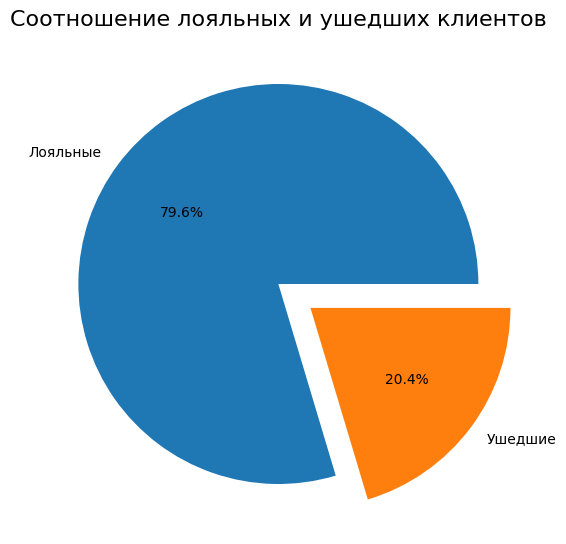

In [2]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_data['Exited'].value_counts(), labels=('Лояльные', 'Ушедшие'), autopct='%.1f%%',explode=[0,0.2]
)
axes.set_title('Соотношение лояльных и ушедших клиентов', fontsize=16)
### Выводы: Клиенты находятся в одном банке, они являются частью целого,
# наглядно соотношение можно показать круговой диаграммой. Лояльных клиентов 79,6%, ушедших 20,4%
     

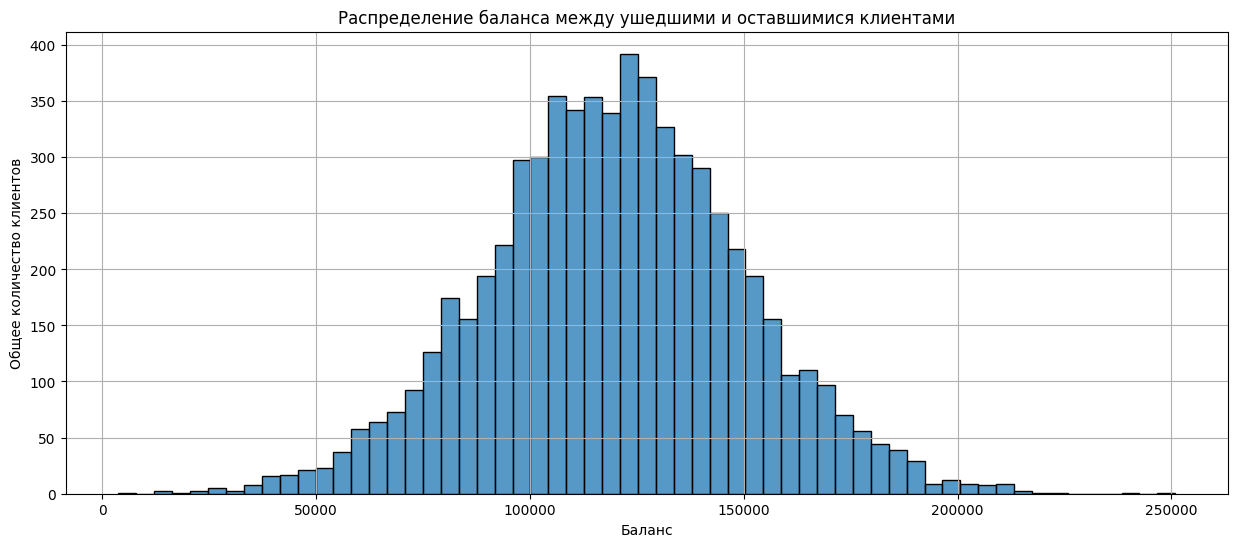

In [3]:
#9.2. Постройте график, показывающий распределение баланса пользователей,
# у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
boxplot = sns.histplot(churn_data[churn_data['Balance'] >= 2500], x= 'Balance')
boxplot.set_title('Распределение баланса между ушедшими и оставшимися клиентами')
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Общее количество клиентов')
boxplot.grid()
#Вывод: У основной части пользователей, у которых на счету больше 2500 долларов баланс находится в диапазоне от 100 000 до 150 000, 
#       выбросы от 0 до 50 000 и от 200 000 до 250 000 встречаются значительно реже. 
#       Распределение похоже на нормальное.


In [12]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

import plotly.express as px
fig1 = px.histogram(data_frame= churn_data,
                    x = 'Balance',
                    color= 'Exited_2',
                    histfunc= 'count',
                    title= 'Гистограмма распределения')
fig1.show()
fig2 = px.box(data_frame=churn_data,
              x='Balance',
              color= 'Exited_2',
              title='Коробчатая диаграмма распределения баланса')
fig2.show()

# вывод: Мы видим большое количество лояльных клиентов с нулевым балансом, у ушедших клиентов нулевых балансов значительно меньше.

In [5]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
import plotly.express as px
fig = px.box(data_frame= churn_data,
             x="Age",
             color= 'Exited_2',
             title='Коробчатая диаграмма расспределения возвраста')
fig.show()
#Вывод: Больше выбросов в лояльной группе, банку стоит обратить на возврастную группу от 30 до 40 лет.

In [6]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
import plotly.express as px
fig= px.ecdf(churn_data,
             x="CreditScore",
             y="EstimatedSalary",
             color = 'Exited_2')
fig.show()
# Выводы: Предполагаемая зарплата ушедших клиетнов несоклько выше чем у лояльных.
#         Кредитный рейтинг ушедших клиентов имеет нижнее значение 350, у лояльных не ниже 405


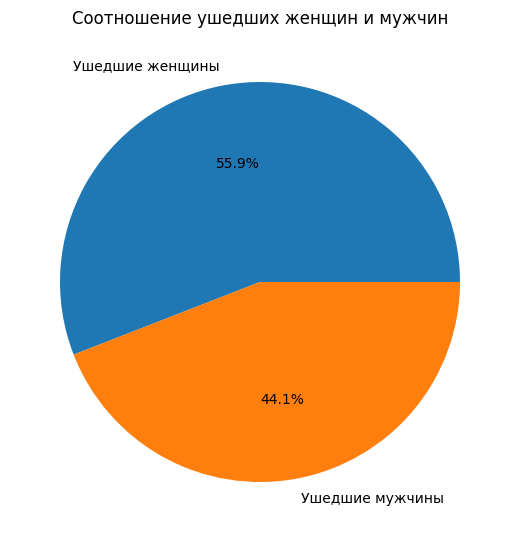

In [7]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(x= churn_data[churn_data.Exited == 1].groupby('Gender')['Exited'].value_counts(),
         labels= ('Ушедшие женщины', 'Ушедшие мужчины'),
         autopct='%.1f%%');
axes.set_title('Соотношение ушедших женщин и мужчин');
#Вывод: женщины уходят чаще

In [8]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
import plotly.express as px
fig= px.histogram(data_frame=churn_data,
            color='NumOfProducts',
            x='Exited_2',
            title='Отток клиентов от числа услуг',
          
            )
fig.show()
# Выводы: У лояльных клиентов приобретенных у банка услуг больше, но их количество меньше, у ушедших чаще встречаютя 3-4 услуги. 
     

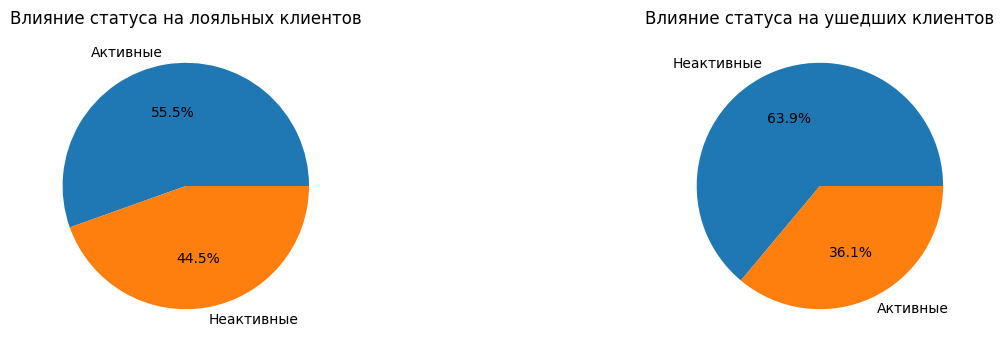

In [9]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
axes[0].pie(x= churn_data[churn_data.Exited ==0]['IsActiveMember'].value_counts(),
            labels= ['Активные','Неактивные'],
            autopct= '%.1f%%',
            )
axes[0].set_title('Влияние статуса на лояльных клиентов');

axes[1].pie(x= churn_data[churn_data.Exited == 1]['IsActiveMember'].value_counts(),
            labels= ['Неактивные','Активные'],
            autopct= '%.1f%%',
            )
axes[1].set_title('Влияние статуса на ушедших клиентов');
# Выводы: # Процент ушедших клиентов имеющих статус активного клиента 36,1%', в то время как у лояльных клиентов процент активных клиентов 55,5%. 
# Рекомендация банку: повышать активность клиентов, больше выгодных предложение, акций, улучшение условий и прочих банковских событий.

In [10]:
# 9.9 В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.

churn_data_country = pd.DataFrame(dict(churn_data[churn_data.Exited == 1].Geography.value_counts()*100 / churn_data.Geography.value_counts()).items(),
                                      columns = ['Country', 'ExitedSum'])

fig = px.choropleth(
    data_frame = churn_data_country,
    locations = 'Country',
    locationmode = 'country names',
    range_color=[0, 30],
    color= 'ExitedSum',
    color_continuous_scale="bluered", 
    title = 'Доля ушедших клиентов по странам', scope="europe", width = 900, height=600, center={'lat': 47, 'lon': 2})
fig.show()
# Выводы: Доля ушедших клиентов в Германии - 32,44%, что в два раза превышает данный показатель для Испании и Франции. Возможно связано с событиями внутри страны.
     

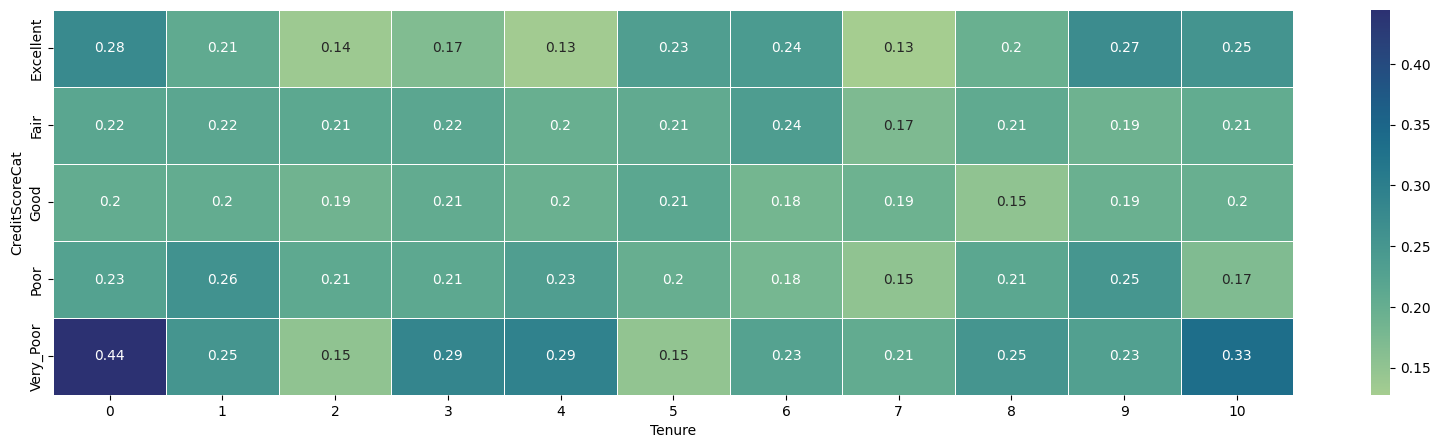

In [11]:
#9.10. Переведите числовой признак CreditScore в категориальный. 
#      Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
#      Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat),
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
import seaborn as sns
import matplotlib.pyplot as plt
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_pivot = churn_data.pivot_table(values= 'Exited',
                               index= 'CreditScoreCat',
                               columns= 'Tenure',
                               aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(20,5))
sns.heatmap(data=churn_pivot, annot= True, linewidth=.5, cmap='crest');

### Вывод: категории кредитного рейтинга которые уходят чаще всего: Very_Poor с продолжительностью нахождением в банке до года.

     
